In [1]:
# Meerah Ebrahim - H00535376, Shaikha Ali - H00534935, Fatima Ali - H00535187
# Group 10

### Importing Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### Importing the Dataset

In [3]:
dataset = pd.read_excel('dubai_properties.xlsx')
dataset

,Address,Rent,Beds,Baths,Type,Area_in_sqft,Rent_per_sqft,Rent_category,Frequency,Furnishing,Purpose,Posted_date,Age_of_listing_in_days,Location,City,Latitude,Longitude
0,"The Gate Tower 2, The Gate Tower, Shams Gate D...",124000,3,4,Apartment,1785,69.467787,Medium,Yearly,Unfurnished,For Rent,2024-03-07,45,Al Reem Island,Abu Dhabi,24.493598,54.407841
1,"Water's Edge, Yas Island, Abu Dhabi",140000,3,4,Apartment,1422,98.452883,Medium,Yearly,Unfurnished,For Rent,2024-03-08,44,Yas Island,Abu Dhabi,24.494022,54.607372
2,"Al Raha Lofts, Al Raha Beach, Abu Dhabi",99000,2,3,Apartment,1314,75.342466,Medium,Yearly,Furnished,For Rent,2024-03-21,31,Al Raha Beach,Abu Dhabi,24.485931,54.600939
3,"Marina Heights, Marina Square, Al Reem Island,...",220000,3,4,Penthouse,3843,57.246942,High,Yearly,Unfurnished,For Rent,2024-02-24,57,Al Reem Island,Abu Dhabi,24.493598,54.407841
4,"West Yas, Yas Island, Abu Dhabi",350000,5,7,Villa,6860,51.020408,High,Yearly,Unfurnished,For Rent,2024-02-16,65,Yas Island,Abu Dhabi,24.494022,54.607372
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73737,"Al Huboob 1, Al Salamah, Umm Al Quwain",14000,0,1,Apartment,419,33.412888,Low,Yearly,Unfurnished,For Rent,2023-12-14,129,Al Salamah,Umm Al Quwain,25.493412,55.575994
73738,"Umm Al Quwain Marina, Umm Al Quwain",14000,0,1,Apartment,500,28.000000,Low,Yearly,Unfurnished,For Rent,2023-12-14,129,Umm Al Quwain Marina,Umm Al Quwain,25.527959,55.606527
73739,"King Faisal Street, Umm Al Quwain",50000,3,4,Apartment,2000,25.000000,Low,Yearly,Unfurnished,For Rent,2024-01-02,110,King Faisal Street,Umm Al Quwain,NaN,NaN
73740,"Al Maqtaa, Umm Al Quwain",37000,1,2,Apartment,989,37.411527,Low,Yearly,Unfurnished,For Rent,2023-10-23,181,Al Maqtaa,Umm Al Quwain,NaN,NaN


### Data Cleaning

In [4]:
missing_values = dataset.isnull().sum()
print("Missing values per column:")
print(missing_values[missing_values > 0])

Missing values per column:
Latitude     719
Longitude    719
dtype: int64


In [5]:
# rows before removal
print(f"Total rows before cleaning: {len(dataset)}")

# Remove rows with missing latitude or longitude
dataset_clean = dataset.dropna(subset=['Latitude', 'Longitude'])

# rows after removal  
print(f"Total rows after cleaning: {len(dataset_clean)}")
print(f"Removed {len(dataset) - len(dataset_clean)} rows with missing coordinates")

# Verify no more missing coordinates
print("\nMissing values after cleaning:")
print(dataset_clean[['Latitude', 'Longitude']].isnull().sum())

Total rows before cleaning: 73742
Total rows after cleaning: 73023
Removed 719 rows with missing coordinates

Missing values after cleaning:
Latitude     0
Longitude    0
dtype: int64


In [6]:
Q1 = dataset['Rent'].quantile(0.25)
Q3 = dataset['Rent'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

115001.0


### Creating a function

In [7]:
ds = dataset.sample(n = 150, replace = False, random_state = 250)

def descriptive_stats(dataset: pd.DataFrame, column: str):
    if column not in dataset.columns:
        print(f"Error: Column \'{column}\' not found in the dataset.")
        return None

    if not pd.api.types.is_numeric_dtype(dataset[column]):
        print(f"Error: Column \'{column}\' is not a numerical type. This function is for numerical data.")
        return None

    # Calculate statistics
    mean_val = dataset[column].mean()
    median_val = dataset[column].median()
    mode_val = dataset[column].mode().iloc[0] if not dataset[column].mode().empty else 'N/A'
    minimum_val = dataset[column].min()
    maximum_val = dataset[column].max()
    std_dev_val = dataset[column].std()
    variance_val = dataset[column].var()
    count_val = dataset[column].count()
    range_val = maximum_val - minimum_val
    
    # Add quartiles and shape statistics
    q1_val = dataset[column].quantile(0.25)
    q3_val = dataset[column].quantile(0.75)
    iqr_val = q3_val - q1_val
    skewness_val = dataset[column].skew()
    kurtosis_val = dataset[column].kurtosis()

    summary = {
        "Mean": mean_val,
        "Median": median_val,
        "Mode": mode_val,
        "Minimum": minimum_val,
        "Maximum": maximum_val,
        "Range": range_val,
        "Standard Deviation": std_dev_val,
        "Variance": variance_val,
        "Count": count_val,
        "Q1 (25th percentile)": q1_val,
        "Q3 (75th percentile)": q3_val,
        "IQR": iqr_val,
        "Skewness": skewness_val,
        "Kurtosis": kurtosis_val
    }

    print(f"\n--- Descriptive Statistics for \'{column}\' ---")
    for key, value in summary.items():
        print(f"{key}: {value:.2f}" if isinstance(value, (int, float)) else f"{key}: {value}")
    
    return summary

# Test the function
descriptive_stats(ds, 'Rent')


--- Descriptive Statistics for 'Rent' ---
Mean: 134544.88
Median: 84999.50
Mode: 110000
Minimum: 10000.00
Maximum: 2199999.00
Range: 2189999.00
Standard Deviation: 209673.75
Variance: 43963081160.64
Count: 150
Q1 (25th percentile): 45500.00
Q3 (75th percentile): 148750.00
IQR: 103250.00
Skewness: 7.12
Kurtosis: 65.06


{'Mean': np.float64(134544.88),
 'Median': 84999.5,
 'Mode': np.int64(110000),
 'Minimum': 10000,
 'Maximum': 2199999,
 'Range': 2189999,
 'Standard Deviation': 209673.7493360661,
 'Variance': 43963081160.64348,
 'Count': np.int64(150),
 'Q1 (25th percentile)': np.float64(45500.0),
 'Q3 (75th percentile)': np.float64(148750.0),
 'IQR': np.float64(103250.0),
 'Skewness': np.float64(7.119082994443336),
 'Kurtosis': np.float64(65.06047367416647)}

In [8]:
sample_data = dataset_clean.sample(n=150, random_state=250, replace=False)

print(f"Created random sample of {len(sample_data)} records from clean data")
print(f"Cleaned dataset size: {len(dataset_clean)}")
print(f"Original dataset size: {len(dataset)}")

# Now run your descriptive stats
descriptive_stats(sample_data, 'Rent')

Created random sample of 150 records from clean data
Cleaned dataset size: 73023
Original dataset size: 73742

--- Descriptive Statistics for 'Rent' ---
Mean: 182602.95
Median: 95000.00
Mode: 85000
Minimum: 26999.00
Maximum: 2500000.00
Range: 2473001.00
Standard Deviation: 312652.63
Variance: 97751667655.62
Count: 150
Q1 (25th percentile): 56999.25
Q3 (75th percentile): 177499.25
IQR: 120500.00
Skewness: 5.33
Kurtosis: 32.08


{'Mean': np.float64(182602.94666666666),
 'Median': 95000.0,
 'Mode': np.int64(85000),
 'Minimum': 26999,
 'Maximum': 2500000,
 'Range': 2473001,
 'Standard Deviation': 312652.6309750508,
 'Variance': 97751667655.6213,
 'Count': np.int64(150),
 'Q1 (25th percentile)': np.float64(56999.25),
 'Q3 (75th percentile)': np.float64(177499.25),
 'IQR': np.float64(120500.0),
 'Skewness': np.float64(5.325338062753492),
 'Kurtosis': np.float64(32.081409956303844)}

In [9]:
import pandas as pd
import numpy as np

# Systematic sampling function
def systematic_sampling(dataset, condition_column=None, condition_value=None, sample_size=150):
    
    if condition_column and condition_value is not None:
        filtered_data = dataset[dataset[condition_column] == condition_value]
        print(f"Applied condition: {condition_column} = {condition_value}")
        print(f"Filtered dataset size: {len(filtered_data)}")
    else:
        filtered_data = dataset
        print("No conditions applied - using full dataset")
    
    if len(filtered_data) == 0:
        print("No data matches the condition!")
        return None
    
    # Calculate sampling interval
    population_size = len(filtered_data)
    sampling_interval = population_size // sample_size
    
    print(f"Population size: {population_size}")
    print(f"Sampling interval: 1 in every {sampling_interval} records")
    
    # Perform systematic sampling
    start_index = np.random.randint(0, sampling_interval)  # Random start
    systematic_sample = filtered_data.iloc[start_index::sampling_interval].head(sample_size)
    
    print(f"Systematic sample size: {len(systematic_sample)}")
    return systematic_sample

def descriptive_stats(dataset: pd.DataFrame, column: str):
    if column not in dataset.columns:
        print(f"Error: Column '{column}' not found in the dataset.")
        return None

    if not pd.api.types.is_numeric_dtype(dataset[column]):
        print(f"Error: Column '{column}' is not a numerical type.")
        return None

    # Calculate statistics
    mean_val = dataset[column].mean()
    median_val = dataset[column].median()
    mode_val = dataset[column].mode().iloc[0] if not dataset[column].mode().empty else 'N/A'
    minimum_val = dataset[column].min()
    maximum_val = dataset[column].max()
    std_dev_val = dataset[column].std()
    variance_val = dataset[column].var()
    count_val = dataset[column].count()
    range_val = maximum_val - minimum_val
    
    # Quartiles and shape statistics
    q1_val = dataset[column].quantile(0.25)
    q3_val = dataset[column].quantile(0.75)
    iqr_val = q3_val - q1_val
    skewness_val = dataset[column].skew()
    kurtosis_val = dataset[column].kurtosis()

    summary = {
        "Mean": mean_val,
        "Median": median_val,
        "Mode": mode_val,
        "Minimum": minimum_val,
        "Maximum": maximum_val,
        "Range": range_val,
        "Standard Deviation": std_dev_val,
        "Variance": variance_val,
        "Count": count_val,
        "Q1 (25th percentile)": q1_val,
        "Q3 (75th percentile)": q3_val,
        "IQR": iqr_val,
        "Skewness": skewness_val,
        "Kurtosis": kurtosis_val
    }

    print(f"\n--- Descriptive Statistics for '{column}' ---")
    for key, value in summary.items():
        print(f"{key}: {value:.2f}" if isinstance(value, (int, float)) else f"{key}: {value}")
    
    return summary

# Main execution for systematic sampling
print("=" * 80)
print("SYSTEMATIC SAMPLING WITH DESCRIPTIVE STATISTICS")
print("=" * 80)

# Example 1: Systematic sampling without conditions
print("\n" + "=" * 50)
print("EXAMPLE 1: Systematic Sampling - No Conditions")
print("=" * 50)
sample1 = systematic_sampling(dataset_clean, sample_size=150)
if sample1 is not None:
    descriptive_stats(sample1, 'Rent')

# Example 2: Systematic sampling with condition (Apartments only)
print("\n" + "=" * 50)
print("EXAMPLE 2: Systematic Sampling - Apartments Only")
print("=" * 50)
sample2 = systematic_sampling(dataset_clean, condition_column='Type', condition_value='Apartment', sample_size=150)
if sample2 is not None:
    descriptive_stats(sample2, 'Rent')

print("\n" + "=" * 80)
print("SYSTEMATIC SAMPLING COMPLETED")
print("=" * 80)

SYSTEMATIC SAMPLING WITH DESCRIPTIVE STATISTICS

EXAMPLE 1: Systematic Sampling - No Conditions
No conditions applied - using full dataset
Population size: 73023
Sampling interval: 1 in every 486 records
Systematic sample size: 150

--- Descriptive Statistics for 'Rent' ---
Mean: 158194.81
Median: 105000.00
Mode: 95000
Minimum: 12000.00
Maximum: 1175000.00
Range: 1163000.00
Standard Deviation: 180633.64
Variance: 32628511838.84
Count: 150
Q1 (25th percentile): 61250.00
Q3 (75th percentile): 170000.00
IQR: 108750.00
Skewness: 3.12
Kurtosis: 11.55

EXAMPLE 2: Systematic Sampling - Apartments Only
Applied condition: Type = Apartment
Filtered dataset size: 56153
Population size: 56153
Sampling interval: 1 in every 374 records
Systematic sample size: 150

--- Descriptive Statistics for 'Rent' ---
Mean: 96978.22
Median: 73944.00
Mode: 60000
Minimum: 13999.00
Maximum: 399999.00
Range: 386000.00
Standard Deviation: 72489.80
Variance: 5254770637.18
Count: 150
Q1 (25th percentile): 49250.00
Q3 (

In [10]:
# Detailed Descriptive Statistics Report for the Dependent Variable

def detailed_descriptive_report(dataset, dependent_var='Rent'):
    """
    Create a comprehensive descriptive statistics report for the dependent variable
    """
    print("=" * 80)
    print("DETAILED DESCRIPTIVE STATISTICS REPORT")
    print("=" * 80)
    print(f"Dependent Variable: {dependent_var}")
    print(f"Dataset Size: {len(dataset)} records")
    print("=" * 80)
    
    # Basic Statistics
    data = dataset[dependent_var]
    print("\n1. BASIC STATISTICS")
    print("-" * 40)
    print(f"Count: {data.count():,}")
    print(f"Mean: {data.mean():,.2f}")
    print(f"Median: {data.median():,.2f}")
    print(f"Mode: {data.mode().iloc[0] if not data.mode().empty else 'N/A':,}")
    print(f"Standard Deviation: {data.std():,.2f}")
    print(f"Variance: {data.var():,.2f}")
    
    # Range Statistics
    print("\n2. RANGE STATISTICS")
    print("-" * 40)
    print(f"Minimum: {data.min():,.2f}")
    print(f"Maximum: {data.max():,.2f}")
    print(f"Range: {data.max() - data.min():,.2f}")
    print(f"Q1 (25th percentile): {data.quantile(0.25):,.2f}")
    print(f"Q3 (75th percentile): {data.quantile(0.75):,.2f}")
    print(f"IQR (Interquartile Range): {data.quantile(0.75) - data.quantile(0.25):,.2f}")
    
    # Shape Statistics
    print("\n3. DISTRIBUTION SHAPE")
    print("-" * 40)
    print(f"Skewness: {data.skew():.4f}")
    skew_interpretation = "Right-skewed" if data.skew() > 0 else "Left-skewed" if data.skew() < 0 else "Symmetric"
    print(f"Interpretation: {skew_interpretation} (>{'0.5' if data.skew() > 0.5 else '0'})")
    print(f"Kurtosis: {data.kurtosis():.4f}")
    kurtosis_interpretation = "Heavy-tailed" if data.kurtosis() > 0 else "Light-tailed" if data.kurtosis() < 0 else "Normal"
    print(f"Interpretation: {kurtosis_interpretation}")
    
    # Percentiles
    print("\n4. PERCENTILES")
    print("-" * 40)
    percentiles = [0.01, 0.05, 0.10, 0.25, 0.50, 0.75, 0.90, 0.95, 0.99]
    for p in percentiles:
        print(f"{int(p*100)}th percentile: {data.quantile(p):,.2f}")
    
    # Outlier Analysis
    print("\n5. OUTLIER ANALYSIS")
    print("-" * 40)
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    print(f"Lower bound (Q1 - 1.5*IQR): {lower_bound:,.2f}")
    print(f"Upper bound (Q3 + 1.5*IQR): {upper_bound:,.2f}")
    print(f"Number of outliers: {len(outliers):,}")
    print(f"Percentage of outliers: {(len(outliers)/len(data)*100):.2f}%")
    
    # Data Quality
    print("\n6. DATA QUALITY")
    print("-" * 40)
    print(f"Missing values: {data.isnull().sum()}")
    print(f"Duplicate values: {data.duplicated().sum()}")
    print(f"Zero values: {(data == 0).sum()}")
    
    # Summary Insights
    print("\n7. KEY INSIGHTS")
    print("-" * 40)
    print(f"• Central tendency: Mean ({data.mean():,.0f}) > Median ({data.median():,.0f}) indicates right skew")
    print(f"• Spread: IQR of {IQR:,.0f} shows moderate variability in middle 50% of data")
    print(f"• Extremes: Range from {data.min():,.0f} to {data.max():,.0f} suggests diverse property values")
    print(f"• Distribution: {skew_interpretation} with {kurtosis_interpretation.lower()} distribution")
    print(f"• Data quality: {data.isnull().sum()} missing, {len(outliers)} potential outliers")

# Generate the detailed report
print("FULL DATASET ANALYSIS")
detailed_descriptive_report(dataset_clean, 'Rent')

# Additional: Report for different segments
print("\n" + "=" * 80)
print("SEGMENTED ANALYSIS")
print("=" * 80)

# By Property Type
print("\nBY PROPERTY TYPE")
print("-" * 40)
property_types = dataset_clean['Type'].value_counts().head(3).index
for prop_type in property_types:
    subset = dataset_clean[dataset_clean['Type'] == prop_type]
    print(f"\n{prop_type.upper()} (n={len(subset):,}):")
    print(f"  Mean Rent: {subset['Rent'].mean():,.0f}")
    print(f"  Median Rent: {subset['Rent'].median():,.0f}")
    print(f"  Std Dev: {subset['Rent'].std():,.0f}")

# By Rent Category
print("\nBY RENT CATEGORY")
print("-" * 40)
rent_categories = dataset_clean['Rent_category'].value_counts().index
for category in rent_categories:
    subset = dataset_clean[dataset_clean['Rent_category'] == category]
    print(f"\n{category.upper()} (n={len(subset):,}):")
    print(f"  Mean Rent: {subset['Rent'].mean():,.0f}")
    print(f"  Median Rent: {subset['Rent'].median():,.0f}")

print("\n" + "=" * 80)
print("REPORT COMPLETED")
print("=" * 80)

FULL DATASET ANALYSIS
DETAILED DESCRIPTIVE STATISTICS REPORT
Dependent Variable: Rent
Dataset Size: 73023 records

1. BASIC STATISTICS
----------------------------------------
Count: 73,023
Mean: 148,372.31
Median: 98,000.00
Mode: 120,000
Standard Deviation: 308,265.24
Variance: 95,027,457,068.17

2. RANGE STATISTICS
----------------------------------------
Minimum: 0.00
Maximum: 55,000,000.00
Range: 55,000,000.00
Q1 (25th percentile): 54,999.00
Q3 (75th percentile): 170,000.00
IQR (Interquartile Range): 115,001.00

3. DISTRIBUTION SHAPE
----------------------------------------
Skewness: 83.4466
Interpretation: Right-skewed (>0.5)
Kurtosis: 13898.5677
Interpretation: Heavy-tailed

4. PERCENTILES
----------------------------------------
1th percentile: 16,000.00
5th percentile: 26,000.00
10th percentile: 33,000.00
25th percentile: 54,999.00
50th percentile: 98,000.00
75th percentile: 170,000.00
90th percentile: 275,000.00
95th percentile: 390,000.00
99th percentile: 997,495.22

5. OUTLI

### Import the dataset

In [11]:
df = pd.read_csv('real_estate_dataset.csv')
df

,ID,Square_Feet,Num_Bedrooms,Num_Bathrooms,Num_Floors,Year_Built,Has_Garden,Has_Pool,Garage_Size,Location_Score,Distance_to_Center,Price
0,1,143.635030,1,3,3,1967,1,1,48,8.297631,5.935734,602134.816747
1,2,287.678577,1,2,1,1949,0,1,37,6.061466,10.827392,591425.135386
2,3,232.998485,1,3,2,1923,1,0,14,2.911442,6.904599,464478.696880
3,4,199.664621,5,2,2,1918,0,0,17,2.070949,8.284019,583105.655996
4,5,89.004660,4,3,3,1999,1,0,34,1.523278,14.648277,619879.142523
...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,138.338057,2,2,2,1967,1,0,16,4.296086,5.562583,488496.350722
496,497,195.914028,2,3,1,1977,0,1,45,7.406261,2.845105,657736.921717
497,498,69.433659,1,1,2,2004,0,0,18,8.629724,6.263264,405324.950201
498,499,293.598702,5,1,3,1940,1,0,41,5.318891,16.990684,773035.968028


### Scatter Plot

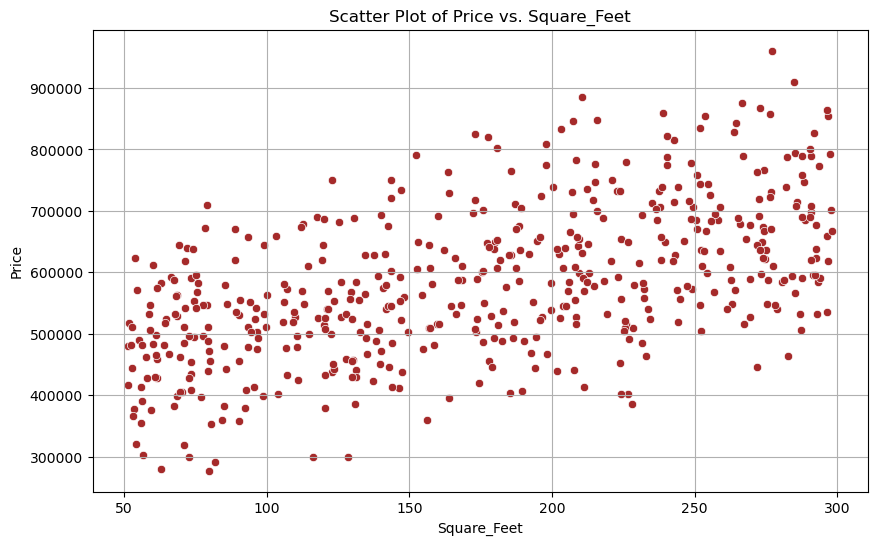

In [12]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Square_Feet', y='Price', data=df, color = 'brown')
plt.title(f'Scatter Plot of {'Price'} vs. {'Square_Feet'}')
plt.xlabel('Square_Feet')
plt.ylabel('Price')
plt.grid(True)

### Box-Plot

Text(0, 0.5, 'Price')

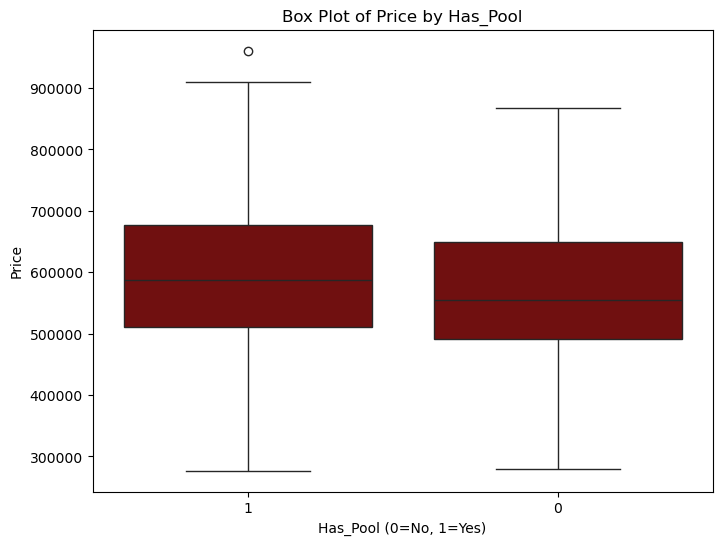

In [13]:
df['Has_Pool'] = df['Has_Pool'].astype(str)
plt.figure(figsize=(8, 6))
sns.boxplot(x='Has_Pool', y='Price', data=df, color = 'Maroon')
plt.title(f'Box Plot of {'Price'} by {'Has_Pool'}')
plt.xlabel(f'{'Has_Pool'} (0=No, 1=Yes)')
plt.ylabel('Price')

### Histogram

Text(0, 0.5, 'Frequency')

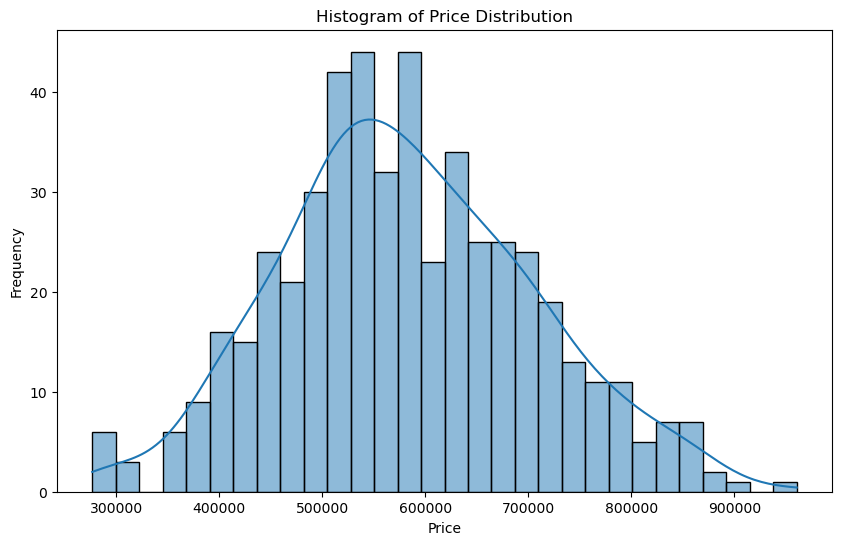

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], kde=True, bins=30)
plt.title(f'Histogram of {'Price'} Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')

### Correlation Heat Map

Text(0.5, 1.0, 'Correlation Heat Map')

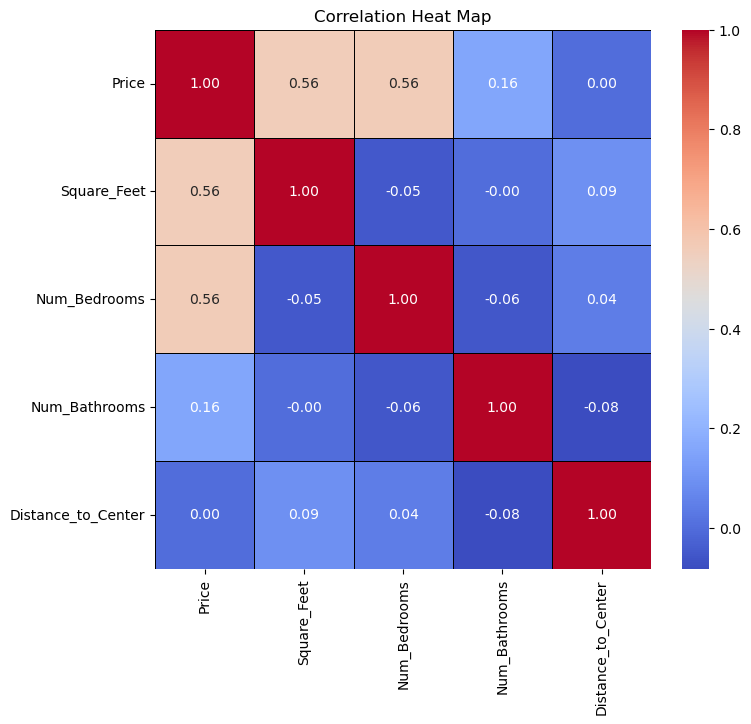

In [15]:
numerical_cols = ['Price', 'Square_Feet', 'Num_Bedrooms', 'Num_Bathrooms', 'Distance_to_Center']
correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(8, 7))
# Use 'annot=True' to show the correlation values on the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, linecolor='black')
plt.title('Correlation Heat Map')

### Hypothesis Testing

In [16]:
import pandas as pd
from scipy.stats import pearsonr, spearmanr, chi2_contingency

Y_VAR = 'Price'
X_NUM_VAR = 'Square_Feet'
X_CAT_VAR = 'Has_Pool'
# Significance level
ALPHA = 0.05

# 1. Pearson Correlation (Numerical vs. Numerical)
print("--- 1. Pearson Correlation Test (Linear Relationship) ---")
# H0: No linear correlation between Price and Square_Feet
# H1: Linear correlation exists
pearson_corr, pearson_p_value = pearsonr(df[X_NUM_VAR], df[Y_VAR])
print(f"Pearson Correlation Coefficient (r): {pearson_corr:.4f}")
print(f"P-value: {pearson_p_value:.4f}")

if pearson_p_value < ALPHA:
    print(f"Conclusion: Reject H0. There is a statistically significant linear correlation (p < {ALPHA}).")
else:
    print(f"Conclusion: Fail to Reject H0. There is no statistically significant linear correlation (p >= {ALPHA}).")

# 2. Spearman Correlation (Numerical vs. Numerical - Monotonic Relationship)
print("\n--- 2. Spearman Correlation Test (Monotonic Relationship) ---")
# H0: No monotonic relationship between Price and Square_Feet
# H1: Monotonic relationship exists
spearman_corr, spearman_p_value = spearmanr(df[X_NUM_VAR], df[Y_VAR])
print(f"Spearman Rank Correlation Coefficient (rho): {spearman_corr:.4f}")
print(f"P-value: {spearman_p_value:.4f}")

if spearman_p_value < ALPHA:
    print(f"Conclusion: Reject H0. There is a statistically significant monotonic relationship (p < {ALPHA}).")
else:
    print(f"Conclusion: Fail to Reject H0. There is no statistically significant monotonic relationship (p >= {ALPHA}).")

# 3. Chi-square Test (Categorical vs. Categorical)
print(f"\n--- 3. Chi-square Test (Association between Price Category and {X_CAT_VAR}) ---")
# H0: The two categorical variables are independent (no association).
# H1: The two categorical variables are dependent (associated).

# Data Preparation: Convert numerical 'Price' into a categorical variable
price_bins = pd.cut(df[Y_VAR], bins=3, labels=['Low', 'Medium', 'High'])
df['Price_Category'] = price_bins
contingency_table = pd.crosstab(df['Price_Category'], df[X_CAT_VAR])
print("\nContingency Table:")
print(contingency_table)

# Perform the Chi-square test
chi2, chi2_p_value, dof, expected = chi2_contingency(contingency_table)

print(f"\nChi-square Statistic: {chi2:.4f}")
print(f"P-value: {chi2_p_value:.4f}")
print(f"Degrees of Freedom: {dof}")

if chi2_p_value < ALPHA:
    print(f"Conclusion: Reject H0. There is a statistically significant association (p < {ALPHA}).")
else:
    print(f"Conclusion: Fail to Reject H0. There is no statistically significant association (p >= {ALPHA}).")


--- 1. Pearson Correlation Test (Linear Relationship) ---
Pearson Correlation Coefficient (r): 0.5586
P-value: 0.0000
Conclusion: Reject H0. There is a statistically significant linear correlation (p < 0.05).

--- 2. Spearman Correlation Test (Monotonic Relationship) ---
Spearman Rank Correlation Coefficient (rho): 0.5609
P-value: 0.0000
Conclusion: Reject H0. There is a statistically significant monotonic relationship (p < 0.05).

--- 3. Chi-square Test (Association between Price Category and Has_Pool) ---

Contingency Table:
Has_Pool          0    1
Price_Category          
Low              75   55
Medium          160  152
High             19   39

Chi-square Statistic: 10.0532
P-value: 0.0066
Degrees of Freedom: 2
Conclusion: Reject H0. There is a statistically significant association (p < 0.05).


### Sample ttest

In [17]:
from scipy.stats import ttest_1samp 
import pandas as pd

Price = df[ "Price"]. dropna()
# Perform one-sample t-test against population mean = 6
t_stat, p_value = ttest_1samp (Price, 6)
# Output results
print ("Sample Mean:", Price-Price.mean())
print("T-test statistic:", t_stat)
print("p-value:", p_value)

Sample Mean: 0       19925.187218
1        9215.505858
2     -117730.932649
3         896.026468
4       37669.512994
           ...      
495    -93713.278807
496     75527.292189
497   -176884.679327
498    190826.338499
499    282089.870689
Name: Price, Length: 500, dtype: float64
T-test statistic: 106.47017218536394
p-value: 0.0


## Build, Train, Develop, and Evaluate

### Simple Regression

In [18]:
dataset = pd.read_csv('real_estate_dataset.csv')
X =dataset.iloc[:,[1]].values   #pressure column
y = dataset.iloc[:,-1].values  #or [:,[4]] energy column
print(X)

[[143.63502971]
 [287.6785766 ]
 [232.99848545]
 [199.66462105]
 [ 89.00466011]
 [ 88.99863008]
 [ 64.52090304]
 [266.54403644]
 [200.27875294]
 [227.01814445]
 [ 55.14612357]
 [292.47746304]
 [258.1106602 ]
 [103.08477767]
 [ 95.4562418 ]
 [ 95.85112746]
 [126.06056074]
 [181.18910791]
 [157.98625466]
 [122.80728505]
 [202.96322368]
 [ 84.87346516]
 [123.03616213]
 [141.59046082]
 [164.01749605]
 [246.29399035]
 [ 99.91844554]
 [178.5586096 ]
 [198.10364222]
 [ 61.61260318]
 [201.88621298]
 [ 92.63103092]
 [ 66.26289825]
 [287.22138431]
 [291.40800827]
 [252.09933703]
 [126.15344229]
 [ 74.4180285 ]
 [221.05825663]
 [160.03812343]
 [ 80.50955871]
 [173.79422753]
 [ 58.59713028]
 [277.33010052]
 [114.6949954 ]
 [215.63057109]
 [127.92776902]
 [180.01700529]
 [186.67756984]
 [ 96.21361388]
 [292.39615694]
 [243.78320584]
 [284.87473539]
 [273.70683761]
 [199.4749947 ]
 [280.46855876]
 [ 72.12312551]
 [ 98.9957156 ]
 [ 61.30682223]
 [131.33258269]
 [147.16932242]
 [117.83725794]
 [257.18

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 1/3,random_state = 0)

In [20]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [21]:
y_pred = regressor.predict(X_test)
print(X_test)
print(y_pred)

[[ 79.89856148]
 [ 92.37318667]
 [ 73.49548496]
 [286.81214435]
 [212.30257553]
 [ 95.85112746]
 [152.2382361 ]
 [272.56594597]
 [232.05408715]
 [172.36319007]
 [288.48214425]
 [123.61222302]
 [297.6262855 ]
 [197.70831514]
 [ 54.14695723]
 [111.93274738]
 [105.89895963]
 [210.60481955]
 [296.41261353]
 [ 74.4180285 ]
 [ 52.2992629 ]
 [290.29764096]
 [285.11464609]
 [107.19954137]
 [215.63057109]
 [226.56055679]
 [ 84.87346516]
 [276.33766049]
 [180.68320735]
 [173.12942345]
 [137.72875314]
 [273.13974962]
 [106.98379064]
 [274.30393949]
 [ 67.79716212]
 [119.34529575]
 [ 69.61409534]
 [189.60106243]
 [ 90.73360677]
 [211.36807398]
 [215.04934418]
 [127.92776902]
 [256.61436653]
 [192.07715083]
 [242.81758667]
 [287.6785766 ]
 [106.06732737]
 [234.47422917]
 [218.12961402]
 [128.58899527]
 [186.40419733]
 [219.39109046]
 [158.46291231]
 [121.21012359]
 [ 79.96634183]
 [258.1106602 ]
 [202.93018656]
 [106.6239438 ]
 [116.30059192]
 [ 93.30046748]
 [139.61643214]
 [249.57379474]
 [ 94.35

In [22]:
regressor.predict([[143.635030]])

array([553407.90844061])

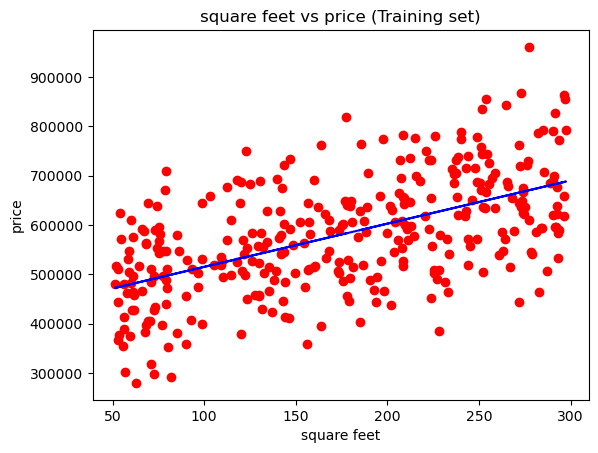

In [23]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('square feet vs price (Training set)')
plt.xlabel('square feet')
plt.ylabel('price')
plt.show()

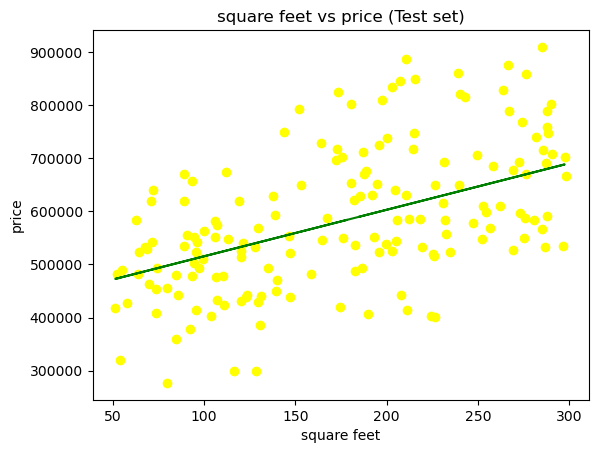

In [24]:
plt.scatter(X_test, y_test, color = 'yellow')
plt.plot(X_train, regressor.predict(X_train), color = 'green')
plt.title('square feet vs price (Test set)')
plt.xlabel('square feet')
plt.ylabel('price')
plt.show()

In [25]:
print(regressor.coef_)
print(regressor.intercept_)

[875.13438301]
427707.9550829289


In [26]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.29424795660692604

### Multiple Linear Regression

In [27]:
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values
print(X)

[[143.63502971   1.           3.         ...  48.           8.2976312
    5.93573364]
 [287.6785766    1.           2.         ...  37.           6.06146565
   10.8273922 ]
 [232.99848545   1.           3.         ...  14.           2.91144248
    6.90459907]
 ...
 [ 69.43365924   1.           1.         ...  18.           8.62972399
    6.26326404]
 [293.59870192   5.           1.         ...  41.           5.31889079
   16.99068431]
 [296.55268612   4.           3.         ...  20.           7.89432194
    1.7797943 ]]


In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [29]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [30]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[293526.42 276892.47]
 [394835.87 378305.09]
 [411859.15 407682.14]
 [525329.52 531774.74]
 [602363.32 584792.07]
 [529959.34 523527.97]
 [763601.83 791677.2 ]
 [690666.95 691956.03]
 [565038.51 583119.8 ]
 [698514.69 696835.46]
 [772041.98 747371.31]
 [452387.96 442615.72]
 [735930.39 701186.06]
 [800038.32 809037.37]
 [342987.89 320014.71]
 [679405.06 673010.59]
 [540737.56 551379.12]
 [640561.75 631283.44]
 [526812.5  534963.41]
 [465101.89 493819.27]
 [466124.22 481711.14]
 [836181.29 800972.11]
 [592827.91 566252.78]
 [436421.58 432105.52]
 [829435.85 848335.01]
 [667035.52 649930.05]
 [460636.24 479876.36]
 [849614.74 857487.18]
 [822591.   802007.17]
 [826995.51 824524.73]
 [638625.42 628041.06]
 [562251.05 596811.66]
 [566205.12 573486.15]
 [783042.61 767053.86]
 [497106.   532377.58]
 [623731.33 619610.37]
 [467081.02 462703.38]
 [438873.88 407318.84]
 [558582.5  554926.47]
 [427532.26 413971.78]
 [729594.54 747398.28]
 [543385.52 532329.56]
 [567459.99 568484.72]
 [607131.4 

In [31]:
regressor.predict([[143.635030,1,3,3,1967,1,1,48,8.297631,5.935734]])

array([599904.62])

In [32]:
print(regressor.coef_)
print(regressor.intercept_)

[ 1021.27 50793.17 29462.51 20821.11  1510.46 31958.46 47780.53  1155.62
  4701.92 -1980.74]
-2881980.9505025474


In [33]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.979901762621613

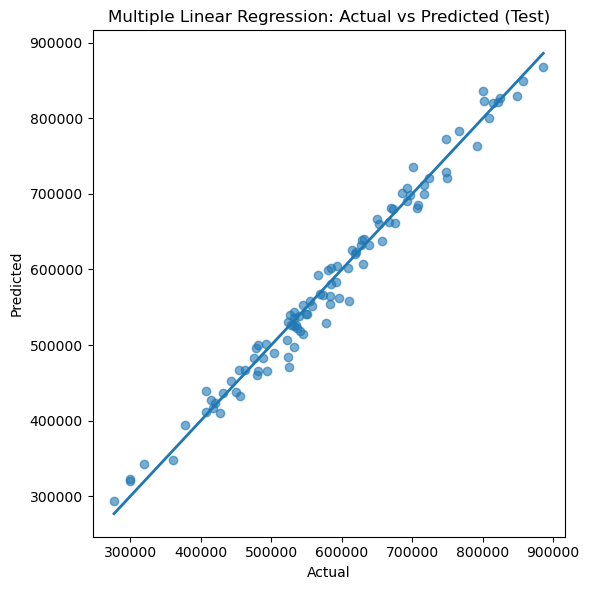

In [34]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.6)
minv, maxv = np.min([y_test.min(), y_pred.min()]), np.max([y_test.max(), y_pred.max()])
plt.plot([minv, maxv], [minv, maxv], linewidth=2)  # 45° reference line

plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Multiple Linear Regression: Actual vs Predicted (Test)')
plt.tight_layout()
plt.show()

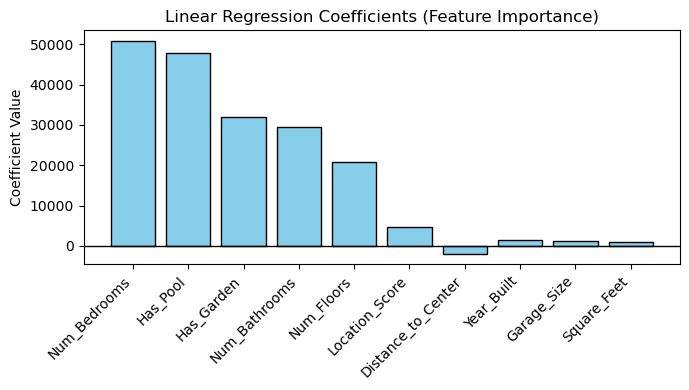

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# Get feature names (all columns except the target)
feature_names = list(dataset.columns[1:-1])

# Get coefficients from your trained model
coefs = regressor.coef_.ravel()

# Sort by absolute value (most important first)
order = np.argsort(np.abs(coefs))[::-1]

plt.figure(figsize=(7,4))
plt.bar([feature_names[i] for i in order], coefs[order], color='skyblue', edgecolor='black')
plt.xticks(rotation = 45, ha = 'right')
plt.axhline(0, color='black', linewidth=1)
plt.ylabel('Coefficient Value')
plt.title('Linear Regression Coefficients (Feature Importance)')
plt.tight_layout()
plt.show()

### Logistic Regression

In [36]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

print("Classes:", le.classes_)

Classes: [276892.47 280166.11 291630.93 298871.67 299387.12 299477.85 301823.92
 318416.12 320014.71 352899.27 354991.35 358006.55 359887.85 359989.96
 366413.9  376178.52 377060.   378305.09 379122.26 381658.93 382372.19
 385122.35 386204.07 390319.58 394665.75 396497.95 398238.88 399136.54
 401169.07 402001.14 402540.82 404098.3  405147.5  405324.95 407318.84
 407682.14 408507.95 412014.39 413087.08 413609.13 413729.07 413971.78
 417122.88 419777.35 423506.53 424012.95 427818.45 428108.09 428376.72
 428668.28 429308.11 429591.99 431988.46 432105.52 434617.49 437751.64
 437797.49 438805.87 439102.99 440991.88 441572.37 442615.72 442965.52
 443440.05 444555.31 445001.43 446084.37 446555.02 450007.5  450110.74
 452538.09 454363.32 455326.61 455758.97 456161.23 456241.34 457514.73
 458567.79 458704.41 461988.48 462703.38 464227.59 464478.7  464849.92
 466357.44 466696.77 466936.15 468040.08 471158.46 472072.7  474291.06
 475302.1  475921.45 477723.9  478489.3  479576.53 479876.36 481257.

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [38]:
y_train_cat = pd.qcut(y_train, q=3, labels=['Low','Medium','High'])
y_test_cat  = pd.qcut(y_test, q=3, labels=['Low','Medium','High'])

In [39]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [40]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

Confusion Matrix:
 [[35  7  0]
 [ 7 28  6]
 [ 0  3 39]]
Accuracy: 0.816
Precision: 0.813
Recall: 0.816
F1 Score: 0.814
Error Rate: 0.184


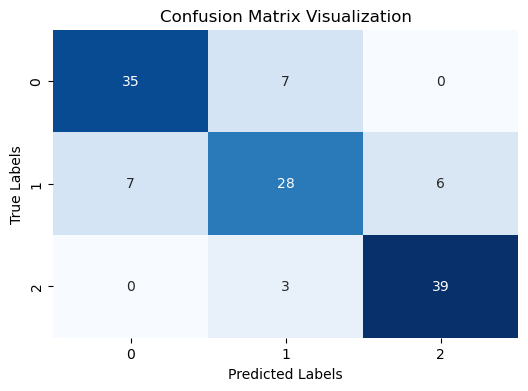

In [41]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

y_train_cat = pd.qcut(y_train, q=3, labels=['Low', 'Medium', 'High'])
y_test_cat  = pd.qcut(y_test, q=3, labels=['Low', 'Medium', 'High'])

classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train, y_train_cat)
y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test_cat, y_pred, labels=['Low', 'Medium', 'High'])
print("Confusion Matrix:\n", cm)

acc = accuracy_score(y_test_cat, y_pred)
print("Accuracy:", round(acc, 3))

prec = precision_score(y_test_cat, y_pred, average='weighted', zero_division=0)
rec  = recall_score(y_test_cat, y_pred, average='weighted', zero_division=0)
f1   = f1_score(y_test_cat, y_pred, average='weighted', zero_division=0)

print("Precision:", round(prec, 3))
print("Recall:", round(rec, 3))
print("F1 Score:", round(f1, 3))

error = 1 - acc
print("Error Rate:", round(error, 3))

import seaborn as sns
import matplotlib.pyplot as plt

# Create the heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)

# Add labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Visualization')
plt.show()

### KNN

--- K-Nearest Neighbors (KNN) Results ---
Accuracy: 0.7700

Confusion Matrix:
[[ 4  0  3]
 [ 0 16 16]
 [ 2  2 57]]


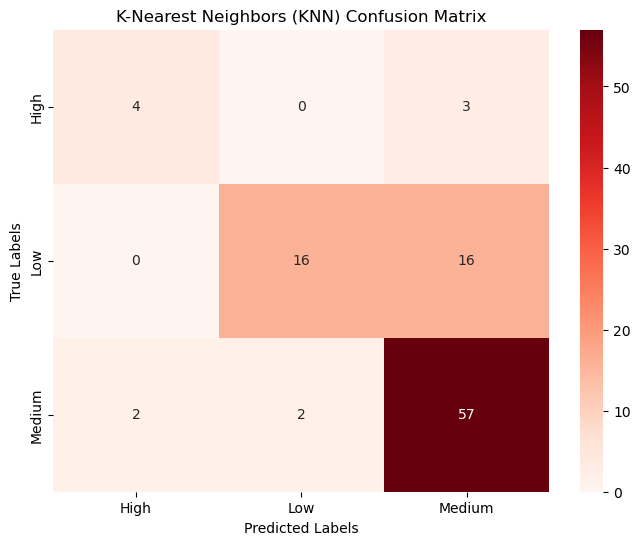


Sample of Predictions (First 5): ['Medium' 'Medium' 'Medium' 'Low' 'Medium']
Actual Values (First 5):       ['Medium', 'Medium', 'Medium', 'Low', 'Medium']
Categories (3, object): ['Low' < 'Medium' < 'High']


In [42]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score

FEATURE_COLUMNS = [
    'Square_Feet', 
    'Num_Bedrooms', 
    'Num_Bathrooms', 
    'Num_Floors', 
    'Year_Built', 
    'Has_Garden', 
    'Has_Pool', 
    'Garage_Size', 
    'Location_Score', 
    'Distance_to_Center'
]

df['Price_Category'] = pd.cut(df['Price'], bins=3, labels=['Low', 'Medium', 'High'])

X = df[FEATURE_COLUMNS].values
y = df['Price_Category'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Initialize and Train the KNN Classifier
classifier_knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
classifier_knn.fit(X_train, y_train)

# Predict the test set results
y_pred_knn = classifier_knn.predict(X_test)

# Evaluate the model
cm_knn = confusion_matrix(y_test, y_pred_knn)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

print("--- K-Nearest Neighbors (KNN) Results ---")
print(f"Accuracy: {accuracy_knn:.4f}")
print("\nConfusion Matrix:")
print(cm_knn)

# visulisation
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Reds', xticklabels=classifier_knn.classes_, yticklabels=classifier_knn.classes_)
plt.title('K-Nearest Neighbors (KNN) Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# sample of predictions for demonstration
sample_size = 5
print(f"\nSample of Predictions (First {sample_size}): {y_pred_knn[:sample_size]}")
print(f"Actual Values (First {sample_size}):       {y_test[:sample_size]}")


### Naïve-Bayes

--- Naïve-Bayes Results ---
Accuracy: 0.8000

Confusion Matrix:
[[ 3  0  4]
 [ 0 19 13]
 [ 2  1 58]]


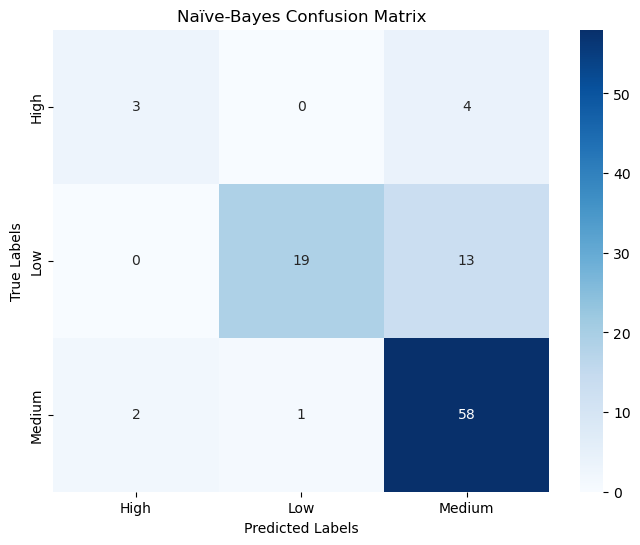


Sample of Predictions (First 5): ['Medium' 'Medium' 'Medium' 'Low' 'Medium']
Actual Values (First 5):       ['Medium', 'Medium', 'Medium', 'Low', 'Medium']
Categories (3, object): ['Low' < 'Medium' < 'High']


In [43]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score

classifier_nb = GaussianNB()
classifier_nb.fit(X_train, y_train)
y_pred_nb = classifier_nb.predict(X_test)

cm_nb = confusion_matrix(y_test, y_pred_nb)
accuracy_nb = accuracy_score(y_test, y_pred_nb)

print("--- Naïve-Bayes Results ---")
print(f"Accuracy: {accuracy_nb:.4f}")
print("\nConfusion Matrix:")
print(cm_nb)

# visualize
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', xticklabels=classifier_nb.classes_, yticklabels=classifier_nb.classes_)
plt.title('Naïve-Bayes Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Print a sample of predictions for demonstration
sample_size = 5
print(f"\nSample of Predictions (First {sample_size}): {y_pred_nb[:sample_size]}")
print(f"Actual Values (First {sample_size}):       {y_test[:sample_size]}")


### Decision Tree

--- Decision Tree Results ---
Accuracy: 0.8600

Confusion Matrix:
[[ 6  0  1]
 [ 0 24  8]
 [ 2  3 56]]


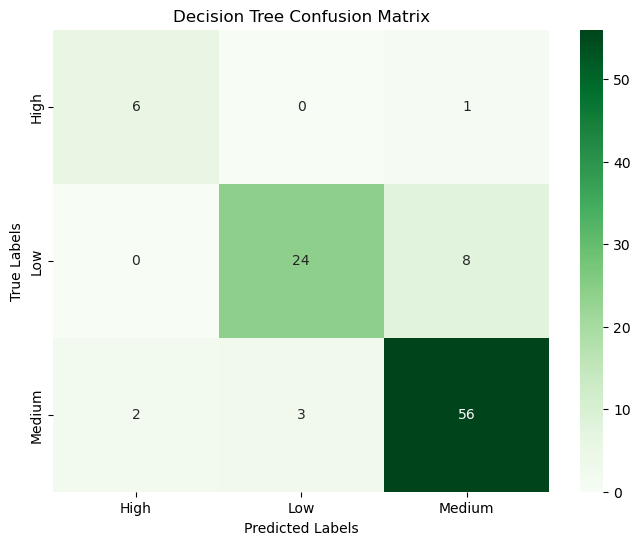


Sample of Predictions (First 5): ['Medium' 'Medium' 'Medium' 'Low' 'Medium']
Actual Values (First 5):       ['Medium', 'Medium', 'Medium', 'Low', 'Medium']
Categories (3, object): ['Low' < 'Medium' < 'High']


In [44]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

classifier_dt = DecisionTreeClassifier(criterion='entropy', random_state=42)
classifier_dt.fit(X_train, y_train)
y_pred_dt = classifier_dt.predict(X_test)

cm_dt = confusion_matrix(y_test, y_pred_dt)
accuracy_dt = accuracy_score(y_test, y_pred_dt)

print("--- Decision Tree Results ---")
print(f"Accuracy: {accuracy_dt:.4f}")
print("\nConfusion Matrix:")
print(cm_dt)

# visulaisation
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Greens', xticklabels=classifier_dt.classes_, yticklabels=classifier_dt.classes_)
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

sample_size = 5
print(f"\nSample of Predictions (First {sample_size}): {y_pred_dt[:sample_size]}")
print(f"Actual Values (First {sample_size}):       {y_test[:sample_size]}")

### Confusion Matrix Preformance Evaluation

In [48]:
model_accuracies = {
    "Logistic Regression": 0.816,
    "K-Nearest Neighbors (KNN)": 0.7700,
    "Naïve-Bayes": 0.8000,
    "Decision Tree": 0.8600
}

# Find the Best Model
best_model = max(model_accuracies, key=model_accuracies.get)
best_accuracy = model_accuracies[best_model]

# Print the Summary Table
print("--- Task 12: Model Performance Summary ---")
print("{:<25} {:<10}".format("Model", "Accuracy"))
print("-" * 35)
for model, acc in model_accuracies.items():
    print("{:<25} {:<10.4f}".format(model, acc))

print("\n--- Conclusion ---")
print(f"The best fit classifier is the {best_model} with an accuracy of {best_accuracy:.4f}.")
print("This model demonstrates the highest overall predictive power for the property price categories.")

--- Task 12: Model Performance Summary ---
Model                     Accuracy  
-----------------------------------
Logistic Regression       0.8160    
K-Nearest Neighbors (KNN) 0.7700    
Naïve-Bayes               0.8000    
Decision Tree             0.8600    

--- Conclusion ---
The best fit classifier is the Decision Tree with an accuracy of 0.8600.
This model demonstrates the highest overall predictive power for the property price categories.


### Predict the dependent variable by using best-fit classifier.

In [51]:
final_predictions = classifier_dt.predict(X_test)

print("--- Final Predictions using Best-Fit Classifier (Decision Tree) ---")
print(f"Best Model Accuracy: {accuracy_dt:.4f}")

--- Final Predictions using Best-Fit Classifier (Decision Tree) ---
Best Model Accuracy: 0.8600


### Cluster Analysis

Scaled data shape: (500, 2)
Features used for clustering: ['Square_Feet', 'Price']


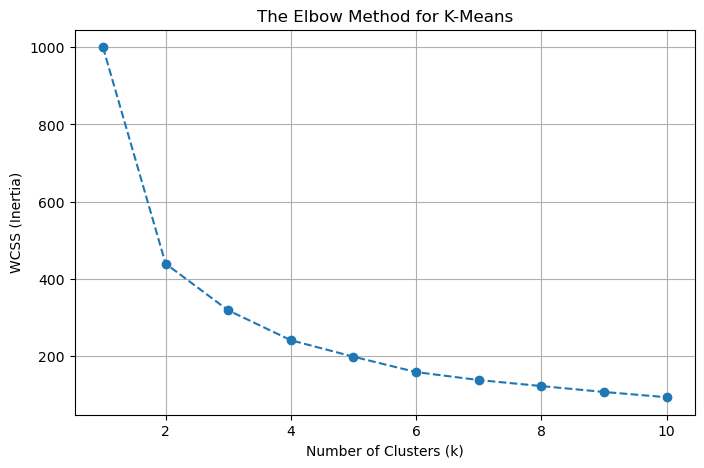


--- K-Means: Elbow Method Plot Generated ---
ELBOW METHOD EXPLANATION: This plot shows how the within-cluster sum of squares decreases as we increase the number of clusters.
Look for the 'elbow' point where the rate of decrease sharply changes - this is the optimal number of clusters.
Based on the plot, choose the 'elbow' point as the optimal k.
K-Means Clustering applied with k=4.


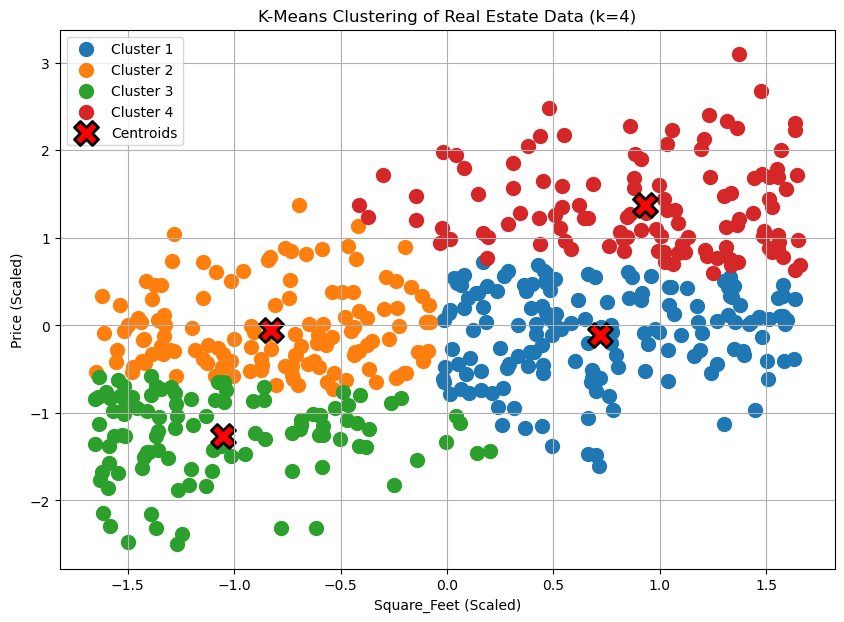

--- K-Means Final Cluster Plot Generated ---
K-MEANS CLUSTERS EXPLANATION: This scatter plot shows the properties grouped into clusters based on Square Feet and Price.
Each color represents a different cluster, and the red X markers show the cluster centroids (center points).
Properties in the same cluster have similar characteristics in terms of size and price.


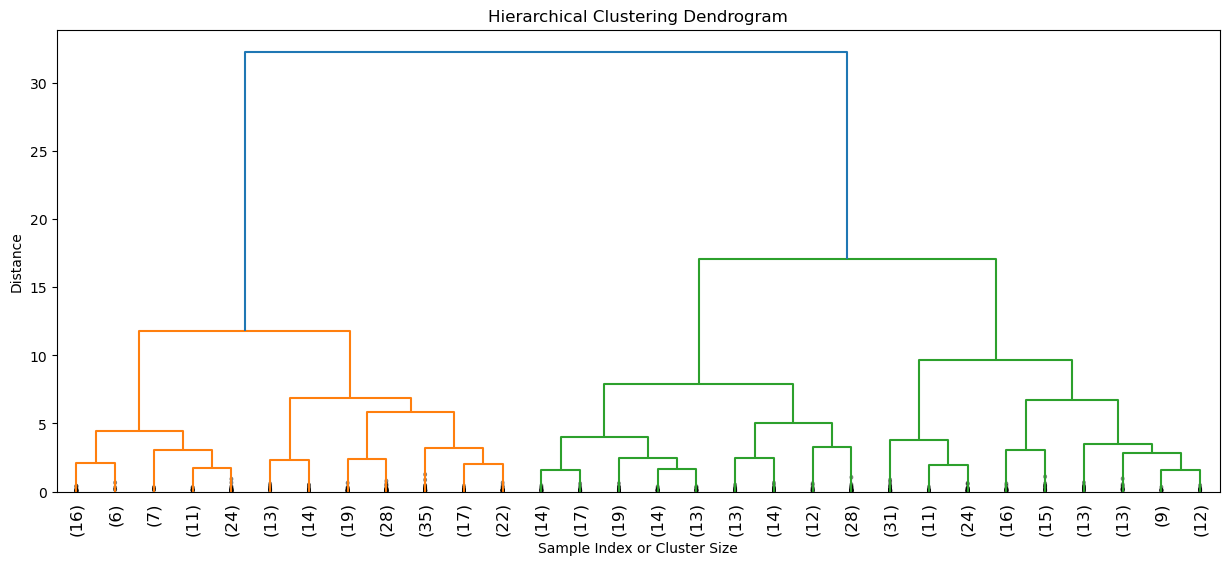


--- Hierarchical Clustering: Dendrogram Generated ---
DENDROGRAM EXPLANATION: This tree-like diagram shows how clusters are merged at different distance levels.
The vertical lines represent the distance between clusters - longer lines mean more distinct clusters.
To choose the optimal number of clusters, look for the longest vertical line that does not intersect any horizontal line.
Hierarchical Clustering applied with k=4.


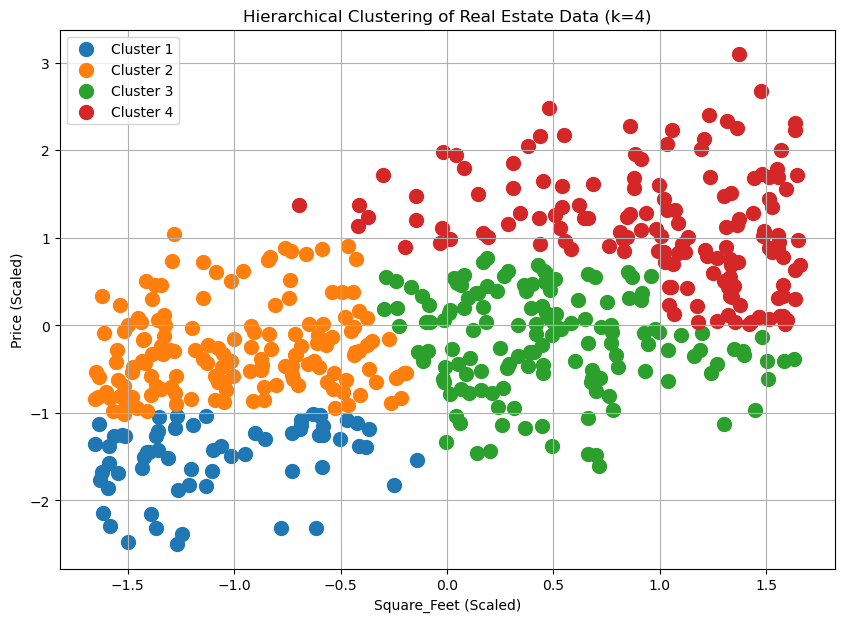

--- Hierarchical Clustering Final Cluster Plot Generated ---
HIERARCHICAL CLUSTERS EXPLANATION: This shows the final clusters created by hierarchical clustering.
Unlike K-Means, this method builds clusters by successively merging similar properties together.
Both methods should show similar grouping patterns if the data has clear natural clusters.


In [18]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt

df = pd.read_csv('real_estate_dataset.csv')

# Define the features you want to use for clustering
CLUSTERING_FEATURES = ['Square_Feet', 'Price']  # Adjust based on your dataset

# Select the features and scale them
X = df[CLUSTERING_FEATURES].values

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(f"Scaled data shape: {X_scaled.shape}")
print("Features used for clustering:", CLUSTERING_FEATURES)

# --- K-MEANS CLUSTERING ---

# Elbow Method to find the Optimal Number of Clusters (k)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('The Elbow Method for K-Means')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.grid(True)
plt.show()
print("\n--- K-Means: Elbow Method Plot Generated ---")
print("ELBOW METHOD EXPLANATION: This plot shows how the within-cluster sum of squares decreases as we increase the number of clusters.")
print("Look for the 'elbow' point where the rate of decrease sharply changes - this is the optimal number of clusters.")
print("Based on the plot, choose the 'elbow' point as the optimal k.")

# Let's assume the optimal k is 4 for demonstration purposes
optimal_k = 4 

# 2. Apply K-Means with the Optimal k
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42, n_init=10)
y_kmeans = kmeans.fit_predict(X_scaled)
print(f"K-Means Clustering applied with k={optimal_k}.")

# 3. Visualize the K-Means Clusters
plt.figure(figsize=(10, 7))
# Plot each cluster
for i in range(optimal_k):
    plt.scatter(
        X_scaled[y_kmeans == i, 0], 
        X_scaled[y_kmeans == i, 1], 
        s=100, 
        label=f'Cluster {i+1}'
    )

# Plot the centroids
plt.scatter(
    kmeans.cluster_centers_[:, 0], 
    kmeans.cluster_centers_[:, 1], 
    s=300, 
    c='red', 
    marker='X', 
    label='Centroids',
    edgecolor='black',
    linewidth=2
)
plt.title(f'K-Means Clustering of Real Estate Data (k={optimal_k})')
plt.xlabel(CLUSTERING_FEATURES[0] + ' (Scaled)')
plt.ylabel(CLUSTERING_FEATURES[1] + ' (Scaled)')
plt.legend()
plt.grid(True)
plt.show()
print("--- K-Means Final Cluster Plot Generated ---")
print("K-MEANS CLUSTERS EXPLANATION: This scatter plot shows the properties grouped into clusters based on Square Feet and Price.")
print("Each color represents a different cluster, and the red X markers show the cluster centroids (center points).")
print("Properties in the same cluster have similar characteristics in terms of size and price.")

# --- HIERARCHICAL CLUSTERING ---

# 1. Create the Dendrogram
# 'ward' method minimizes the variance within each cluster
linked = linkage(X_scaled, method='ward')

plt.figure(figsize=(15, 6))
dendrogram(
    linked,
    orientation='top',
    truncate_mode='lastp',  # show only the last p merged clusters
    p=30,                   # show last 30 merges
    show_leaf_counts=True,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index or Cluster Size')
plt.ylabel('Distance')
plt.show()
print("\n--- Hierarchical Clustering: Dendrogram Generated ---")
print("DENDROGRAM EXPLANATION: This tree-like diagram shows how clusters are merged at different distance levels.")
print("The vertical lines represent the distance between clusters - longer lines mean more distinct clusters.")
print("To choose the optimal number of clusters, look for the longest vertical line that does not intersect any horizontal line.")

# 2. Apply Hierarchical Clustering (Assuming k=4 from Dendrogram cut)
# fcluster cuts the dendrogram to form flat clusters
y_hc = fcluster(linked, optimal_k, criterion='maxclust')
print(f"Hierarchical Clustering applied with k={optimal_k}.")

# 3. Visualize the Hierarchical Clusters
plt.figure(figsize=(10, 7))
# Plot each cluster
for i in range(1, optimal_k + 1):
    plt.scatter(
        X_scaled[y_hc == i, 0], 
        X_scaled[y_hc == i, 1], 
        s=100, 
        label=f'Cluster {i}'
    )

plt.title(f'Hierarchical Clustering of Real Estate Data (k={optimal_k})')
plt.xlabel(CLUSTERING_FEATURES[0] + ' (Scaled)')
plt.ylabel(CLUSTERING_FEATURES[1] + ' (Scaled)')
plt.legend()
plt.grid(True)
plt.show()
print("--- Hierarchical Clustering Final Cluster Plot Generated ---")
print("HIERARCHICAL CLUSTERS EXPLANATION: This shows the final clusters created by hierarchical clustering.")
print("Unlike K-Means, this method builds clusters by successively merging similar properties together.")
print("Both methods should show similar grouping patterns if the data has clear natural clusters.")